# **GABRIELE OMAGGIO - Data Science ENGIM 2025**

# Preliminary Operations

First off, we need to import any useful and relevant libraries and import the dataset.

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importing the dataset
from google.colab import drive
drive.mount("/content/drive")
path_csv = '/content/drive/MyDrive/2025 ENGIM/data/access_electricity.csv'

# preparing dataset
df = pd.read_csv(path_csv)


Mounted at /content/drive


# Dataset Description

With shape() we can get an immediate idea of the size of the dataset, while info() allows us to see more details like the data type of the various columns.

In [2]:
df.shape

(242, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   242 non-null    object
 1   Country Code   242 non-null    object
 2   Series Name    242 non-null    object
 3   Series Code    242 non-null    object
 4   2012 [YR2012]  242 non-null    object
 5   2013 [YR2013]  242 non-null    object
 6   2014 [YR2014]  242 non-null    object
 7   2015 [YR2015]  242 non-null    object
 8   2016 [YR2016]  242 non-null    object
 9   Continent      228 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


# Initial Exploration

In [4]:
#number of columns
ds_columns = df.shape[1]
print(f"Number of columns : {ds_columns}")

#number of rows
ds_rows = df.shape[0]
print(f"Number of rows : {ds_rows}")

#type of data
print(df.columns)

Number of columns : 10
Number of rows : 242
Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', 'Continent'],
      dtype='object')


In [5]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


Looking at the "American Samoa" entry has revealed that there are some string values that are simply two points, which denote missing data. This is not appropriate and must be fixed.

In [6]:
# replace ".." strings with nan
df.replace("..", np.nan, inplace=True)

In [7]:
#checking if the replace() has worked
df.head()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


Now that the ".." strings have been changed into NaN values, we can change the data type of the columns that contain numbers into floats. This will make it easier to use these data to do mathematical and logical operations in the future.

In [8]:
#convert the year data columns into numbers
df['2012 [YR2012]'] = df['2012 [YR2012]'].astype(float)
df['2013 [YR2013]'] = df['2013 [YR2013]'].astype(float)
df['2014 [YR2014]'] = df['2014 [YR2014]'].astype(float)
df['2015 [YR2015]'] = df['2015 [YR2015]'].astype(float)
df['2016 [YR2016]'] = df['2016 [YR2016]'].astype(float)

Now that the values have been changed, we can use info() again to see the result.

In [9]:
#check if the datafram now has the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   242 non-null    object 
 1   Country Code   242 non-null    object 
 2   Series Name    242 non-null    object 
 3   Series Code    242 non-null    object 
 4   2012 [YR2012]  240 non-null    float64
 5   2013 [YR2013]  240 non-null    float64
 6   2014 [YR2014]  240 non-null    float64
 7   2015 [YR2015]  239 non-null    float64
 8   2016 [YR2016]  239 non-null    float64
 9   Continent      228 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.0+ KB


# Data Selection

Selection 1 - First five countries with iloc[]

In [10]:
df.iloc[[0,1,2,3,4]]

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.10000,67.259552,89.500000,71.500000,84.137138,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.00000,100.000000,100.000000,100.000000,100.000000,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.76466,99.134987,99.234344,99.336708,99.439568,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.00000,100.000000,100.000000,100.000000,100.000000,Europe


Selection 2 - 5 entries and the continent they belong to with loc[]

In [11]:
df.loc[[10,20,30,40,50], "Continent"]

,Continent
10,North America
20,North America
30,Europe
40,Europe
50,North America


Selection 3 - first 10 countries

In [12]:
df[0:10]

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.100000,67.259552,89.500000,71.500000,84.137138,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.764660,99.134987,99.234344,99.336708,99.439568,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.821964,36.990490,32.000000,42.000000,40.520607,Africa
6,Antigua and Barbuda,ATG,Access to electricity (% of population),EG.ELC.ACCS.ZS,95.254692,95.773552,96.298416,96.826294,97.354668,North America
7,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,87.288244,88.389705,88.076774,88.517967,88.768654,Asia
8,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.584412,99.837128,99.959244,99.995209,100.000000,South America
9,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.878876,99.954056,99.988976,100.000000,100.000000,Asia


Selection 4 - Continents and amount of countries classified as them

In [13]:
df["Continent"].value_counts()

,count
Continent,
Africa,56
Asia,55
Europe,52
North America,31
Oceania,18
South America,16


# Rearrangements

Sort 1 - top 10 lower values in 2012

In [14]:
df[['Country Name' ,'2012 [YR2012]']].sort_values(by='2012 [YR2012]', ascending=True).head(10)

,Country Name,2012 [YR2012]
199,South Sudan,4.912345
32,Burundi,6.500000
39,Chad,7.069442
135,Malawi,7.400000
124,Liberia,8.599684
38,Central African Republic,11.595876
89,Guinea-Bissau,12.064826
162,Niger,14.400000
190,Sierra Leone,15.174726
214,Tanzania,15.300000


Sort 2 -top 10 higher values in 2016

In [15]:
df[['Country Name' ,'2016 [YR2016]']].sort_values(by='2016 [YR2016]', ascending=False).head(10)

,Country Name,2016 [YR2016]
1,Albania,100.0
4,Andorra,100.0
14,"Bahamas, The",100.0
12,Austria,100.0
11,Australia,100.0
9,Armenia,100.0
8,Argentina,100.0
15,Bahrain,100.0
13,Azerbaijan,100.0
30,Bulgaria,100.0


# New column creation

A useful information to have would be to have a mean of the values of each year for every country. This is how we can add a column and then populate it with a mean value.

In [16]:
#creating a column with the mean values for each country.
df["Mean Variation"] = df.apply(lambda row: np.mean([row['2012 [YR2012]'], row['2013 [YR2013]'], row['2014 [YR2014]'], row['2015 [YR2015]'], row['2016 [YR2016]']]), axis=1)

#check if the column has been added
df.head(10)

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent,Mean Variation
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.100000,67.259552,89.500000,71.500000,84.137138,Asia,76.299338
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe,100.000000
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.764660,99.134987,99.234344,99.336708,99.439568,Africa,99.182053
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,Oceania,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe,100.000000
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.821964,36.990490,32.000000,42.000000,40.520607,Africa,37.466612
6,Antigua and Barbuda,ATG,Access to electricity (% of population),EG.ELC.ACCS.ZS,95.254692,95.773552,96.298416,96.826294,97.354668,North America,96.301524
7,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,87.288244,88.389705,88.076774,88.517967,88.768654,Asia,88.208269
8,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.584412,99.837128,99.959244,99.995209,100.000000,South America,99.875198
9,Armenia,ARM,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.878876,99.954056,99.988976,100.000000,100.000000,Asia,99.964381


# Graphs

Graph 1 - Barplot (Matplotlib) - Continents and number of countries for each continent.

Here we can show which continent is more represented when compared to the others in terms of countries.

Text(0, 0.5, 'Count')

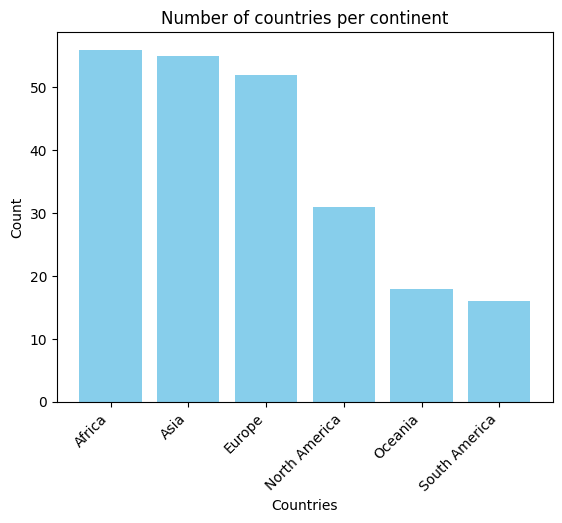

In [17]:
data1 = {

         "Countries":df["Continent"].value_counts().index,
         "Count":df["Continent"].value_counts().values
}

df1 = pd.DataFrame(data1)

plt.bar(df1["Countries"], df1["Count"], color = "skyblue")

plt.xticks(rotation = 45, ha="right")

plt.title("Number of countries per continent")
plt.xlabel("Countries")
plt.ylabel("Count")

#print(df1)

Graph 2 - Lineplot (Seaborn) - Variation in Afghanistan over the years

Here we can observe how Afghanistan's values change quite a bit from one year to another. More accurate data gathering might be necessary.

Text(0.5, 1.0, 'Variation in Afghanistan (2012-2016)')

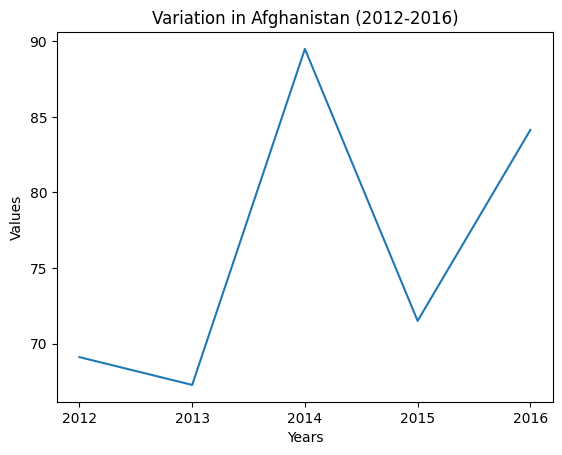

In [18]:
data2 = {

         "Years":["2012", "2013", "2014", "2015", "2016"],
         "Values":[df.loc[0,"2012 [YR2012]"], df.loc[0,"2013 [YR2013]"], df.loc[0,"2014 [YR2014]"], df.loc[0,"2015 [YR2015]"], df.loc[0,"2016 [YR2016]"]]
}

df2 = pd.DataFrame(data2)

g2 = sns.lineplot(data= df2, x="Years", y="Values")
g2.set_title("Variation in Afghanistan (2012-2016)")

Graph 3 - Histogram (Seaborn) - Amount of countries per mean variation.

This shows that more than 140 countries' populations out 242 have 100% access to electricity.



Text(0.5, 1.0, 'Amount of countries per mean variation')

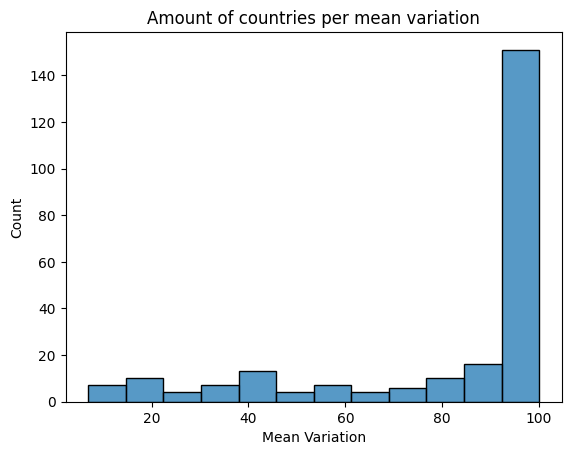

In [19]:
g3 = sns.histplot(df, x= "Mean Variation")
g3.set_title("Amount of countries per mean variation")

Graph 4 - boxplot (Seaborn) - Mean Variation by Continent

This graph shows how Africa is the continent with the most variety in terms of access to electric energy, so much so that there are no outliers (which are present in every other continent).

/tmp/ipython-input-989307895.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g4.set_xticklabels(labels = ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America'], rotation=30)


Text(0.5, 1.0, 'Mean variation by continent')

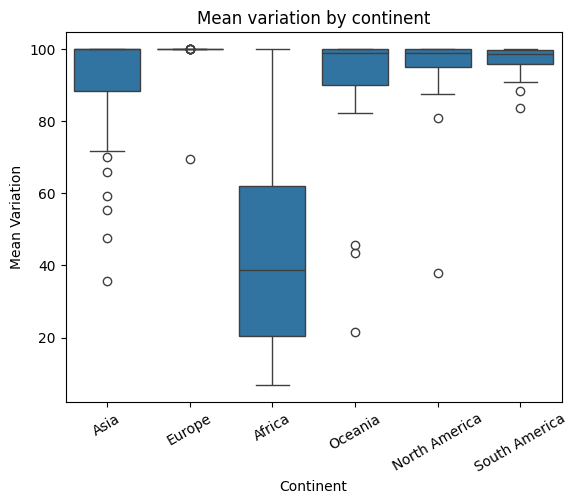

In [20]:
g4 = sns.boxplot(df, x="Continent", y='Mean Variation')

g4.set_xticklabels(labels = ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America'], rotation=30)
g4.set_title("Mean variation by continent")

Graph 5 - Scatterplot (MatplotLib) - Access to electricity in 2012 and in 2016

This graph shows us that the majority of countries in the world have maintained their high level of access to electricity, but many other countries are either progressing slowly, holding steady, or even seeing slight contractions in their electrification progress.

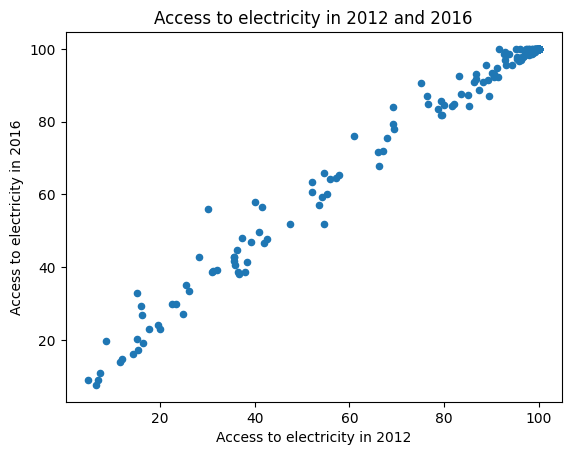

In [21]:
df.plot(x="2012 [YR2012]",  y="2016 [YR2016]", kind="scatter")

plt.title("Access to electricity in 2012 and 2016")
plt.xlabel("Access to electricity in 2012")
plt.ylabel("Access to electricity in 2016")

plt.show()

# Closing comments

The main takeaway from this study is that more than almost 60% of all the countries present in the study have reached a level of electrification of 100%, making electricity accessible to their entire population.

However, there are still a lot of countries where electrification is not total, with outliers present in every continent except in Africa, where the delta between values is massive (between 20% and 60%).